In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train_data_path = '/content/train.csv'
train_data = pd.read_csv(train_data_path)

In [5]:
print("Dataset Head:")
print(train_data.head())
print(" ")

print("\nDataset Tail:")
print(train_data.tail())
print(" ")

print("\nDataset Info:")
print(train_data.info())

Dataset Head:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   200

In [6]:
train_data.fillna(train_data.median(numeric_only=True), inplace=True)

In [7]:
features = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath',
                       'TotalBsmtSF', 'GarageArea', 'YearBuilt']]
target = train_data['SalePrice']

In [8]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()

In [11]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [42867.33305032 -9736.50106698  1197.09324972   109.44538369
 13040.79555168 11993.08232255 20158.25938181]
Model Intercept: 180615.4670212891


In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [16]:
print("\nModel Evaluation Metrics:")
print("Cross-validated R-squared:", cross_val_scores.mean())
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Model Evaluation Metrics:
Cross-validated R-squared: 0.6899274221154629
Mean Squared Error (MSE): 1784015973.0912244
Mean Absolute Error (MAE): 26641.662889868654
Root Mean Squared Error (RMSE): 42237.61325041016
R-squared (R2): 0.7674132853150895


<ipython-input-17-22104a8ab57f>:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_bedrooms, y_pred, color='red', alpha=0.6, edgecolor='k', s=70, marker='x', label='Predicted Prices')


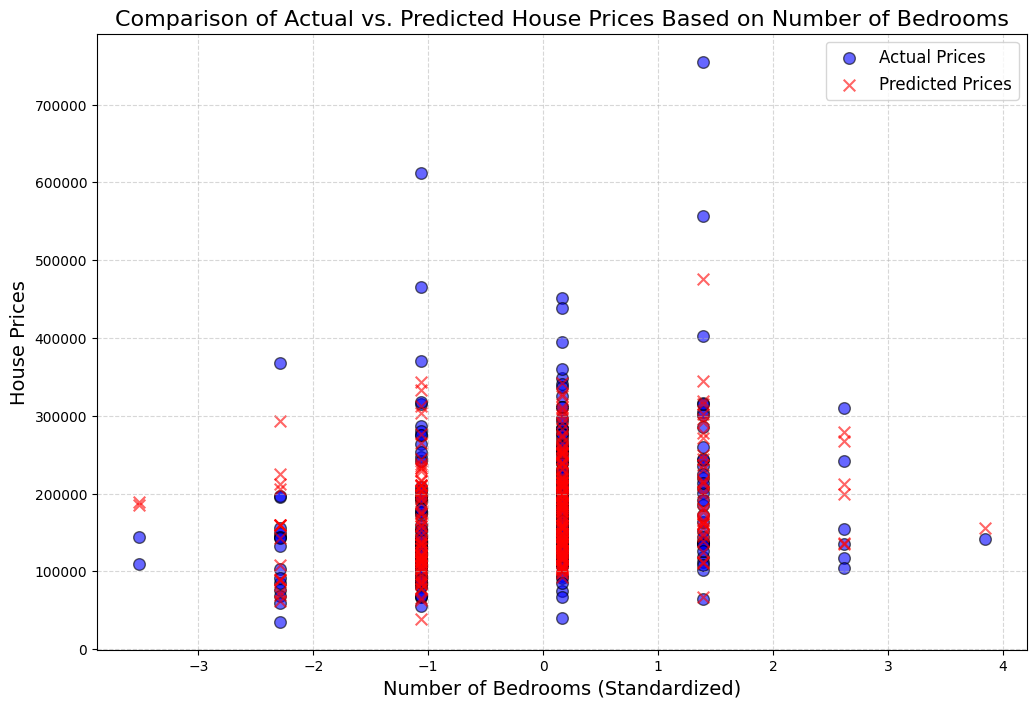

In [17]:
X_test_bedrooms = X_test[:, features.columns.get_loc('BedroomAbvGr')]
plt.figure(figsize=(12, 8))

plt.scatter(X_test_bedrooms, y_test, color='blue', alpha=0.6, edgecolor='k', s=70, label='Actual Prices')

plt.scatter(X_test_bedrooms, y_pred, color='red', alpha=0.6, edgecolor='k', s=70, marker='x', label='Predicted Prices')

plt.xlabel("Number of Bedrooms (Standardized)", fontsize=14)
plt.ylabel("House Prices", fontsize=14)
plt.title("Comparison of Actual vs. Predicted House Prices Based on Number of Bedrooms", fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
